<a href="https://colab.research.google.com/github/Nicole-Wanjiru/TimeSeriesSupermarketSalesAnalysis/blob/main/TimeSeriesSupermarketSalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supermarket Sales Data: Exploratory Data Analysis Project with Time Series

<img src="https://lh3.googleusercontent.com/drive-storage/AJQWtBPfFXUkFNCb9tNHhZbCZX7zdneKD-ye7QzsmvYg-EVjfesWF3IZ_q_AZm2JL6sVLi3Zmpb3JGpQ47bomjhxBPnwriKQOhVdLo7YMo-_BGSRy28=w105-h70-c" width="">

## Overview
A supermarket chain is looking to expand their business. The company leadership team has provided the data team with historical supermarket sales data. Leadership is interested in finding answers to several questions:


1.   What is the average purchase total of a customer's cart?
2.   What was the average overall customer rating?
3.   How do customer ratings compare at each of our 3 branch locations?
4.   Which branch location is most profitable?
5.   Do members tend to spend more money than non-members?
6.   What is our best selling product line?
7.   How do sales fluctuate during the week? Which day of the week is most profitable?






In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the Dataset
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
# 1. Generating the Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
# Checking Empty Records
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


The Dataset have a total of 1000 Sales Records, with no Empty Record to be filled or Removed.

In [ ]:
# Data Column Analysis - Time Series Analysis
df['Date']


,Date
0,1/5/2019
1,3/8/2019
2,3/3/2019
3,1/27/2019
4,2/8/2019
...,...
995,1/29/2019
996,3/2/2019
997,2/9/2019
998,2/22/2019


The Date column is currently storing the date of transactions as string objects. Converting the dates from string objects to datetime objects will allow us to more easily sort and filter transactions by date, perform time series analysis, and visualize sales metrics over time.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Examine the Data to Check Successful Date Conversion
df['Date']

,Date
0,2019-01-05
1,2019-03-08
2,2019-03-03
3,2019-01-27
4,2019-02-08
...,...
995,2019-01-29
996,2019-03-02
997,2019-02-09
998,2019-02-22


The Date are now listed as datetime64, as expected

Now, let change the index, where every sales will be ordered by the Date.

In [ ]:
# Use the Date as the Index
df.set_index('Date', inplace=True)


# Sort the Date from the earliest to the latest.
df.sort_index(inplace=True)

# Examine the Data
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,4.761905,8.448,6.3
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,4.761905,29.583,7.7
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,4.761905,19.036,5.7
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,4.761905,5.408,6.9
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,4.761905,6.287,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-30,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,14:43,Ewallet,874.98,4.761905,43.749,6.0
2019-03-30,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,12:51,Credit card,81.44,4.761905,4.072,9.5
2019-03-30,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,20:37,Cash,290.46,4.761905,14.523,6.7




The previous index column has been successfully replaced by the Date column. We see that there are now 16 columns instead of the original 17. The dates are also correctly sorted from 2019-01-01 to 2019-03-30.

Let's also add a column with day of the week for later time series analysis.

In [ ]:
df['day_of_week'] = df.index.day_of_week
df.groupby('day_of_week').size()

,0
day_of_week,
0,125
1,158
2,143
3,138
4,139
5,164
6,133


In [ ]:
# Label Encode the Days of the week from Numerical Representation to Categorical Representation
# We can use BOTH replace() or map()
df['day_of_week'] = df['day_of_week'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
df['day_of_week']
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,day_of_week
Date,,,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,4.761905,8.448,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,4.761905,29.583,7.7,Tuesday
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,4.761905,19.036,5.7,Tuesday
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,4.761905,5.408,6.9,Tuesday
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,4.761905,6.287,5.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-30,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,14:43,Ewallet,874.98,4.761905,43.749,6.0,Saturday
2019-03-30,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,12:51,Credit card,81.44,4.761905,4.072,9.5,Saturday
2019-03-30,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,20:37,Cash,290.46,4.761905,14.523,6.7,Saturday


1. Lets Determine the Number of Transactions that occured on Every Branch, i, e A, B and C

In [ ]:
df.groupby('Branch').size()

,0
Branch,
A,340
B,332
C,328


2. Transactions per City

In [ ]:
df.groupby('City').size()

,0
City,
Mandalay,332
Naypyitaw,328
Yangon,340


Branch A is Located in Yangon and had of 340 transaction, Branch Located in Manadalay with a Total of 332 transaction and Branch C is Located in Naypyitaw with a Total of 328 transactions.

Lets Calculate Statistical Summary About the Dataset.

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


### Observations
1. The average customer rating was 6.97270 out of 10. The minimum rating was 4.00000 and the maximum was 10.00000.

2. The maximum Quantity was 10 and minimum Quantity was 1.

## DATA CLEANING

In [ ]:
# Check and remove any duplicated record
df.duplicated().sum()

0

In [ ]:
# Removing Unuseful Columns
# gross margin percentage	gross income

df.drop(columns=['gross margin percentage', 'gross income'], inplace=True)
df


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,Rating,day_of_week
Date,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,7.7,Tuesday
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,5.7,Tuesday
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,6.9,Tuesday
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,5.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-30,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,14:43,Ewallet,874.98,6.0,Saturday
2019-03-30,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,12:51,Credit card,81.44,9.5,Saturday
2019-03-30,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,20:37,Cash,290.46,6.7,Saturday


In [ ]:
# Rename the cogs(cost of goods) to Pre-tax Total, Which represented the price of Commonity Before the Tax Deducation.
df.rename(columns={'cogs': 'Pre-tax Total'}, inplace=True)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,Pre-tax Total,Rating,day_of_week
Date,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,7.7,Tuesday
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,5.7,Tuesday
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,6.9,Tuesday
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,5.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-30,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,14:43,Ewallet,874.98,6.0,Saturday
2019-03-30,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,12:51,Credit card,81.44,9.5,Saturday
2019-03-30,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,20:37,Cash,290.46,6.7,Saturday


In [ ]:
# Payment Column Analysis
# Rename the Value Ewallet to E-Wallet
# replace()
df.groupby('Payment').size()

,0
Payment,
Cash,344
Credit card,311
Ewallet,345


In [ ]:
df['Payment'] = df['Payment'].replace('Ewallet', 'E-Wallet')
df.groupby('Payment').size()

,0
Payment,
Cash,344
Credit card,311
E-Wallet,345


## DATA ANALYSIS

### What is the overall customer rating for the supermarket company?

Let's start by looking at the frequency for different customer ratings. We'll create a histogram for ratings across all 3 branches of the supermarket.

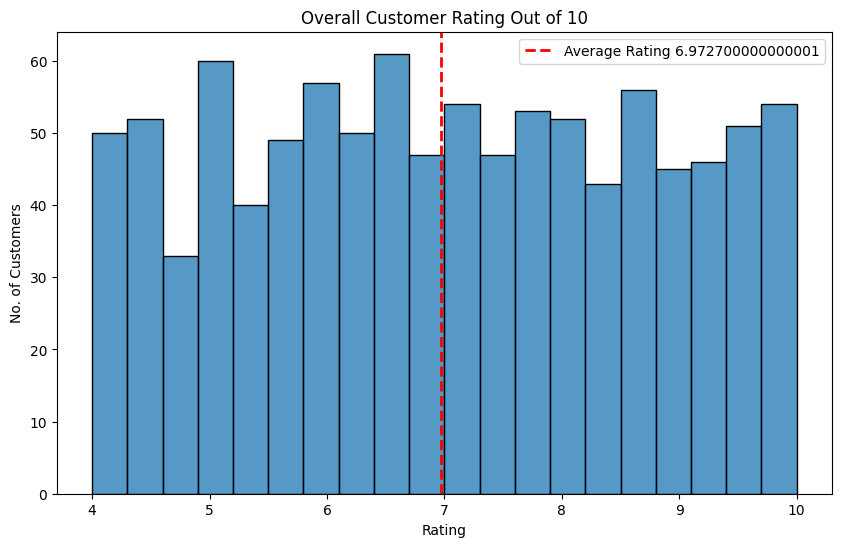

In [ ]:
# Visualize the customer rating a histplot.
plt.figure(figsize=(10, 6))
sns.histplot(data = df, x = 'Rating', bins = 20)

plt.title('Overall Customer Rating Out of 10')
plt.xlabel('Rating')
plt.ylabel('No. of Customers')


# Add the Average rating as a vertical dashed lineon the histogram.
average_rating = df['Rating'].mean()

plt.axvline(average_rating, color = 'red', linestyle = 'dashed', linewidth = 2)
plt.legend([f'Average Rating {average_rating}'])

plt.show()



1. There is a fairly even distribution of ratings from 4 - 10
2. The overall average rating was 6.97 out of 10
3. Although this data is historical, customer surveys could have been used to help identify the most common issues faced by customers


## How do customer ratings compare across the 3 supermarket branches?

Now, let's examine each of the 3 branches of the supermarket to view their individual distributions of ratings. Is there a particular branch with lower customer satisfaction? Recall that Branch A of the supermarket is in Yangon, Branch B is in Mandalay, and Branch C is in Naypyitaw.

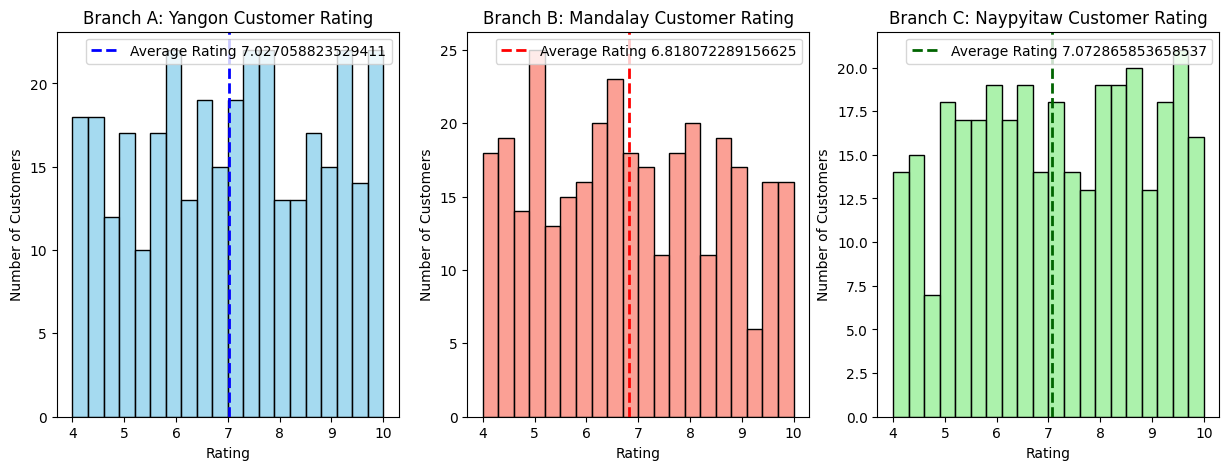

In [ ]:
# Create 3 subsets where we filter each transactions based on the City.
yangon_df = df[df['City'] == 'Yangon']
mandalay_df = df[df['City'] == 'Mandalay']
naypyitaw_df = df[df['City'] == 'Naypyitaw']

# Set up 3 histograms side by side for the three Supermarket Branches
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot the distribution of ratings for each branch
sns.histplot(data=yangon_df, x='Rating', bins=20, color = 'skyblue', ax = axes[0])
sns.histplot(data=mandalay_df, x='Rating', bins=20, color = 'salmon', ax = axes[1])
sns.histplot(data=naypyitaw_df, x='Rating', bins=20, color = 'lightgreen', ax = axes[2])

# Set the titles for each subplot
axes[0].set_title('Branch A: Yangon Customer Rating')
axes[1].set_title('Branch B: Mandalay Customer Rating')
axes[2].set_title('Branch C: Naypyitaw Customer Rating')

# Set the x label as Rating
axes[0].set_xlabel('Rating')
axes[1].set_xlabel('Rating')
axes[2].set_xlabel('Rating')

# Set the y label as Number of Customers.
axes[0].set_ylabel('Number of Customers')
axes[1].set_ylabel('Number of Customers')
axes[2].set_ylabel('Number of Customers')

# Set the average rating for the 3 histogram as dashed line

yangon_average_rating = yangon_df['Rating'].mean()
mandalay_average_rating = mandalay_df['Rating'].mean()
naypyitaw_average_rating = naypyitaw_df['Rating'].mean()

# Draw the axvline for the 3 histograms
# a) yangon
axes[0].axvline(yangon_average_rating, color = 'blue', linestyle = 'dashed', linewidth = 2)
axes[0].legend([f'Average Rating {yangon_average_rating}'])

# b) mandalay
axes[1].axvline(mandalay_average_rating, color = 'red', linestyle = 'dashed', linewidth = 2)
axes[1].legend([f'Average Rating {mandalay_average_rating}'])

# c) naypyitaw
axes[2].axvline(naypyitaw_average_rating, color = 'darkgreen', linestyle = 'dashed', linewidth = 2)
axes[2].legend([f'Average Rating {naypyitaw_average_rating}'])

plt.show()





*   The rating distributions are relatively similar across all three supermarket branches in different cities
*   The difference in average ratings between supermarket branches is relatively small. The highest rating was 7.07 / 10 in Naypyitaw.
*   The lowest was 6.82 in Mandalay. There is not a single branch that seems to have disproportionately low ratings.



## What percentage of transactions were made using a member's card?

This question can be answered using a Piechart by showing the ration of the transaction for Card and Non-Card Holder

<Axes: >

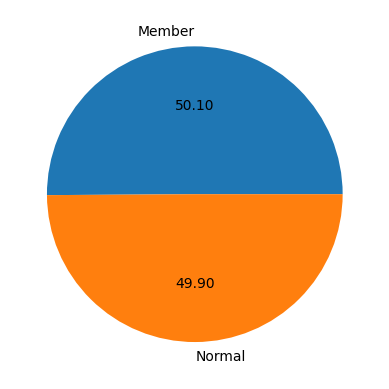

In [ ]:
df.groupby('Customer type').size().plot(kind='pie', autopct='%.2f')



*   There is a roughly even split of transactions involving a member's card versus those which did not.
*   50.1% of transactions used a member's card and 49.9% did not.



## Which product lines drove the highest sales? Which were the most common?

Now we can turn our attention to product lines. If a particular product line is a significant driver of sales, the company can consider investing more into that product line. The company can also address lower performing product lines.

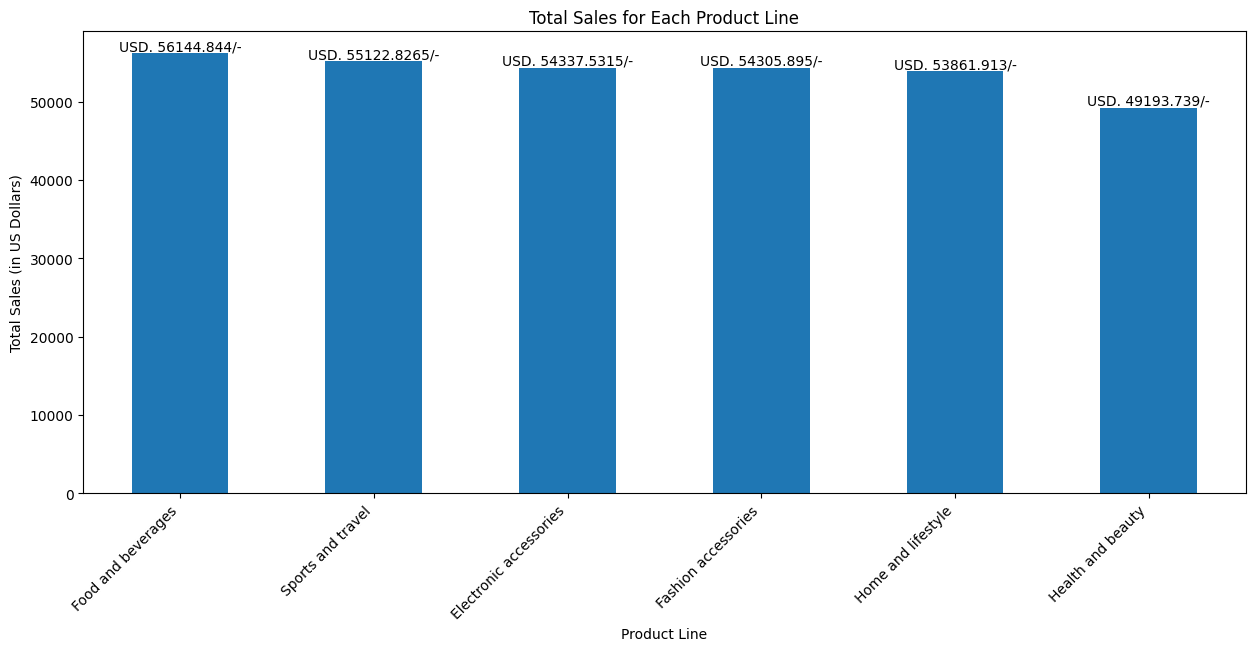

In [ ]:
# Create a DataFrame where the Total Revenue are group According to the Product Line
product_line_totals = df.groupby('Product line').sum('Total')

# Create another DataFrame, where we are ordering from the Highest Total Revenue to the Lowest
product_line_totals = product_line_totals.sort_values(by='Total', ascending=False)
product_line_totals

# Visualize the product line totals
plt.figure(figsize=(15, 6))
ax = product_line_totals['Total'].plot(kind='bar')

# Add axis labels and title
plt.title('Total Sales for Each Product Line')
plt.xlabel('Product Line')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('Total Sales (in US Dollars)')

# Add the labels for the maxim values in the bars
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'USD. {bar.get_height()}/-', ha='center', va='bottom')


plt.show()



*   "Food and Beverages" was the top selling product line with USD 56144.844/- in sales.
*   The next few product lines of "sports and travel", "electronic accessories", "fashion accessories", and "Home and lifestyle" had similar total sales
*   "Health and Beauty" was the lowest selling product line with Ks. 49193.739/- in sales.



## How did product lines perform among different gender categories?

Lets Start by Examining the Gender Categories in the Supermarket.

In [ ]:
df.head(3)
df.groupby('Gender').size()

,0
Gender,
Female,501
Male,499


The dataset contains 501 transactions made by females and 499 transactions made by males

Now let's compare product line popularity between women and men.

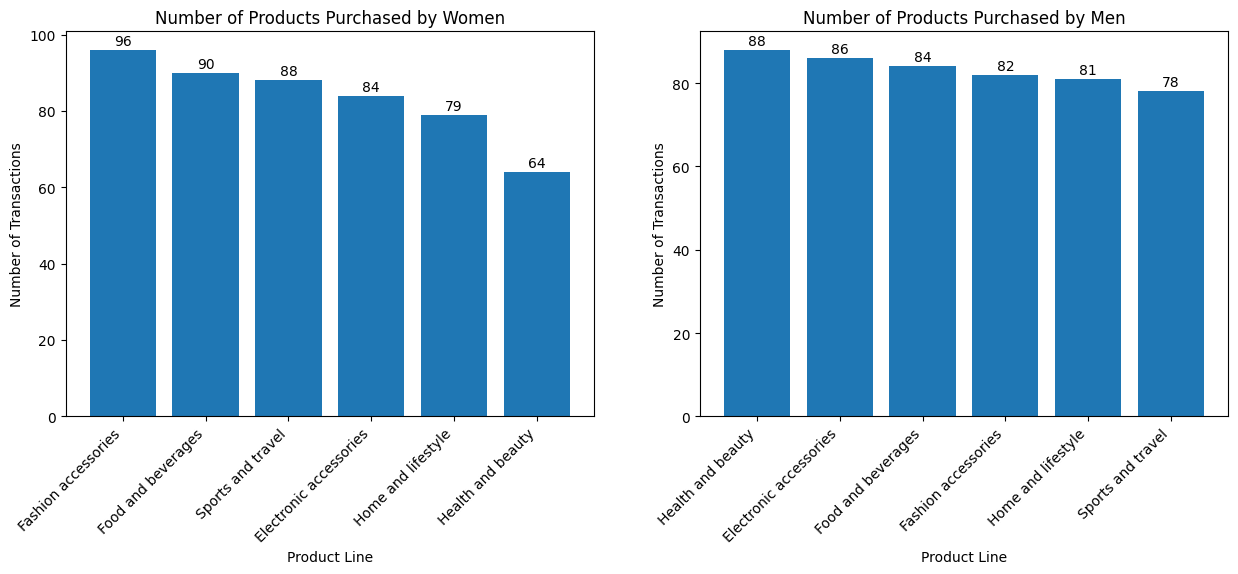

In [ ]:
# Create two separete DataFrames that separates Mens and Women Transaction
women_df = df[df['Gender'] == 'Female']
men_df = df[df['Gender'] == 'Male']

# Also, Lets Separate Products Lines Bought by Men and Women
women_product_line_count = women_df['Product line'].value_counts()
men_product_line_count = men_df['Product line'].value_counts()
men_product_line_count

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# a) women purchases at axis 0
axes[0].bar(women_product_line_count.index, women_product_line_count.values)
axes[0].set_title('Number of Products Purchased by Women')
axes[0].set_xlabel('Product Line')
axes[0].set_xticks(axes[0].get_xticks())
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_ylabel('Number of Transactions')

# Add total number of transaction labels for first bar chart
for bar in axes[0].patches:
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{bar.get_height()}', ha='center', va='bottom')


# b) men purchases at axis 1
axes[1].bar(men_product_line_count.index, men_product_line_count.values)
axes[1].set_title('Number of Products Purchased by Men')
axes[1].set_xlabel('Product Line')
axes[1].set_xticks(axes[1].get_xticks())
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_ylabel('Number of Transactions')


# Add total number of transaction labels for second bar chart
for bar in axes[1].patches:
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{bar.get_height()}', ha='center', va='bottom')






*   Women and men were roughly equally represented in the dataset.
*   The "Fashion accessories" product line was most popular with women with 96 transactions. It was 4th popular for men with 82 transactions.
*   The "Health and Beauty" product line was most popular with men with 88 transactions. However, "Health and Beauty" was least popular with women at 64 transactions.

*   The "Health and Beauty" product line was most popular with men with 88 transactions. However, "Health and Beauty" was least popular with women at 64 transactions.

*   The "Health and Beauty" product line was most popular with men with 88 transactions. However, "Health and Beauty" was least popular with women at 64 transactions.




## How did the sales data fluctuate over time?


In [ ]:
# Group data by date and calculate the total sales for each day
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,Pre-tax Total,Rating,day_of_week
Date,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,7.7,Tuesday
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,5.7,Tuesday
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,E-Wallet,108.16,6.9,Tuesday
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,5.0,Tuesday


In [ ]:
df['Total'].sum()

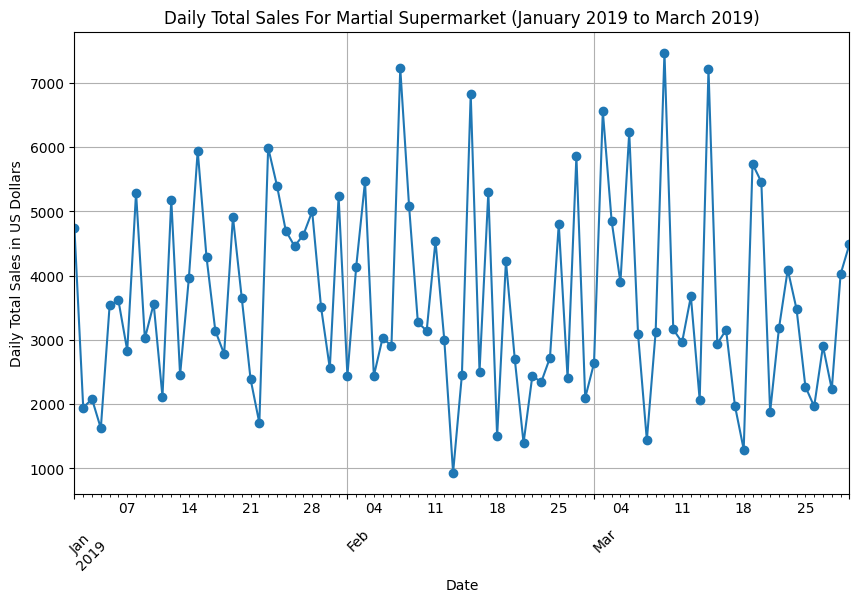

In [ ]:
daily_sales = df.groupby('Date')['Total'].sum()
daily_sales

# Plot the line chart, to Display Time Series Analysis
plt.figure(figsize=(10, 6))
daily_sales.plot(marker='o', linestyle='-')
plt.title('Daily Total Sales For Martial Supermarket (January 2019 to March 2019)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Daily Total Sales in US Dollars')


plt.grid(True)
plt.show()



*   The Daily Sales tend to fluctuate at a fair amount.
*   The Day with the Lowest Sales is February 13th, was on a Wednesday.
*   The highest Sales was in March 9th, was a Saturday.



One hypothesis might be that weekends tend to have higher sales than Weekdays.

Lets Prove to either ACCEPT or REJECT the Hypothesis.

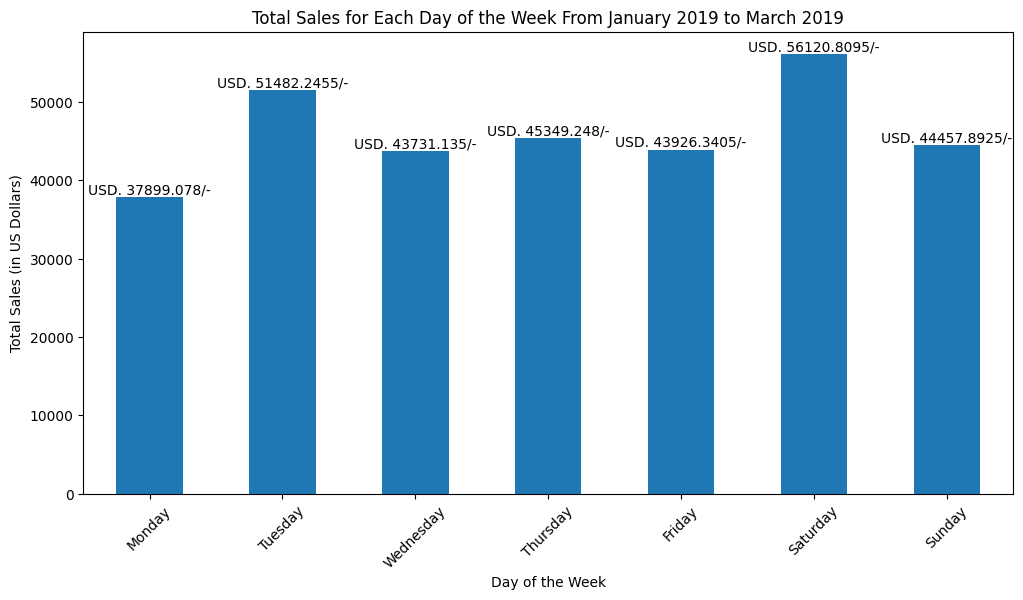

In [ ]:
# Create a Series of the total sales for each day of the week for the entire 3 months period
day_of_week_totals = df.groupby('day_of_week')['Total'].sum()

# Rearrange the day of the week to follow the common order.
day_of_week_totals = day_of_week_totals.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_of_week_totals


# Plot the bar chart
plt.figure(figsize=(12, 6))
ax = day_of_week_totals.plot(kind='bar')

# Add axis labels and title
plt.title('Total Sales for Each Day of the Week From January 2019 to March 2019')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('Total Sales (in US Dollars)')

# Add the labels for the maxim values in the bars
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'USD. {bar.get_height()}/-', ha='center', va='bottom')
plt.show()




*   The Best Day of the Week for sales during the time period was Saturday with a Combined Sales of 56,120.8095/- USD
*   The worst of the week for sales during the period of time was Monday with combined Sales of 37,899.078/- USD.
*   Suprisingly, Tuesday was the Day with the Second Highest Sales.
*   Sundays, Wednesdays, Thursady and Friday all had similar sales

